## TSF-GRIP - Task 1 : Prediction using Supervised ML

## Author : Venkatesan Murugesan

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
data=pd.read_csv("student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Correlation b/w Hours and Scores

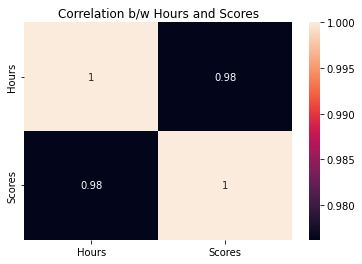

In [4]:
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation b/w Hours and Scores")
plt.show()

### Relation b/w Hours and Scores using Scatter Plot

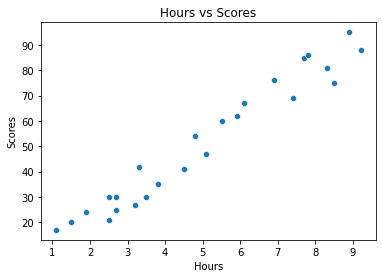

In [5]:
sns.scatterplot(data=data,x='Hours',y='Scores')
plt.title("Hours vs Scores")
plt.show()

### Dividing our data into X and y

In [6]:
X=data[['Hours']]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [7]:
X.shape

(25, 1)

In [8]:
y=data.Scores
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [9]:
y.shape

(25,)

### Dividing our data into Train and Test using train_test_split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [12]:
X_test.shape, y_test.shape

((5, 1), (5,))

### Apply Linear Regression to Train our Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

### Co-effifient and Intercept line with Scatter plot

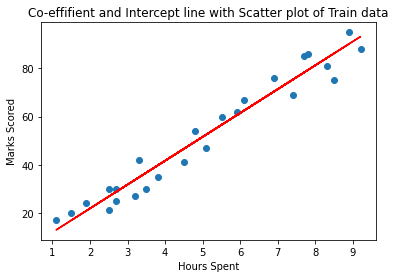

In [16]:
line = model.coef_*X+model.intercept_
plt.plot(X,line,'r')
plt.scatter(X,y)
plt.title("Co-effifient and Intercept line with Scatter plot of Train data")
plt.xlabel("Hours Spent")
plt.ylabel("Marks Scored")
plt.show()

### Prediction using our model and actual vs predicted

In [17]:
y_pred=model.predict(X_test)

In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


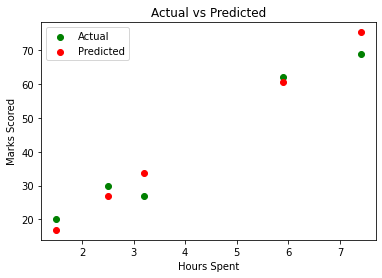

In [21]:
plt.scatter(X_test,y_test,c='g')
plt.scatter(X_test,y_pred,c='r')
plt.title("Actual vs Predicted")
plt.xlabel("Hours Spent")
plt.ylabel("Marks Scored")
plt.legend(['Actual','Predicted'])
plt.show()

Let predict our problem

In [22]:
hrs=9.25

In [23]:
pr_sc=model.predict([[hrs]])

In [24]:
pr_sc

array([93.69173249])

In [25]:
print("No of Hours = ",hrs)
print("Predicted Score = ",pr_sc[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


Ans : If a student spend 9.25 hrs on study, he will score 93.692 as per our model

### Evlauation of our model

In [26]:
from sklearn import metrics

In [27]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R_Squared score(test): 0.9454906892105356
